In [ ]:
import json
import os
import gzip
import pandas as pd
import re

import unicodedata
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data_path = "/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/Electronics_5.json.gz"

In [ ]:
meta_path = "/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/meta_Electronics.json.gz"

In [ ]:

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)


In [ ]:
df1 = parse(data_path)

In [ ]:
df2 = parse(meta_path)

In [ ]:
def word_present(word, text):
    # Escape special characters in the word
    word = re.escape(word)
    # Create a regular expression pattern to match the word surrounded by word boundaries
    pattern = r'\b{}\b'.format(word)
    # Search for the pattern in the text
    match = re.search(pattern, text, flags=re.IGNORECASE)
    # Return True if the word is found, False otherwise
    return bool(match)

In [ ]:
meta_list = []
word = "mouse"

In [ ]:
for item in df2:
  text_lower = item['title'].lower()
  match = word_present(word,text_lower)
  if match:
    meta_list.append(item)


In [ ]:
meta_df = pd.DataFrame(meta_list)

Choose "mouse" as a product

In [ ]:
# Number of Products having mouse in their title are:
len(meta_df)

8952

In [ ]:
meta_df.head(1)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Electronics, Computers &amp; Accessories, Com...",,[Introduction:\n Wonderful optical mouse. Love...,,Cute Car Shape 2.4GHz USB Receiver Mice Wirele...,[],,new brand,[Introduction: Wonderful optical mouse. Lovely...,"[>#25,127 in Computers &amp; Accessories &gt; ...",[],Computers,,"November 6, 2012",,134048160X,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [ ]:
meta_df.to_csv('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/meta_dataset.csv', index=False,escapechar='\\')

## Read meta CSV

In [ ]:
meta_df = pd.read_csv('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/meta_dataset.csv')

In [ ]:
product_asin = set(meta_df['asin'].tolist())

In [ ]:
print(len(product_asin))
print(product_asin)

8536
{'B004UFZBPU', 'B0009OUETY', 'B00CBKKKGQ', 'B017NUDV3C', 'B002P8M6RK', 'B009IVPP1G', 'B004OFJK4O', 'B004UBGSQU', 'B009NUUL5W', 'B0083WGZ7Y', 'B00KUL1LGG', 'B000GABCY2', 'B009A4XIMO', 'B00BO1FIZG', 'B01EFAGMRA', 'B00JESDEHK', 'B005O239FW', 'B00PIQ0W22', 'B009D9CZ5C', 'B002QUZM0U', 'B00QAKM5S4', 'B00MVK8JNW', 'B00MP57D08', 'B00CCIKKDU', 'B017HHPNZU', 'B00HYHXWN4', 'B00B3G6JV4', 'B01HCLN0KG', 'B0044P5NKY', 'B000UKUAZU', 'B013WJRG5C', 'B00NFIJ4S8', 'B014Z871RW', 'B011KPTWTS', 'B005UQRZG6', 'B00KG5REIA', 'B005H47M14', 'B0016LJJMW', 'B007Y8CDL0', 'B005MR598O', 'B00H8NKJKS', 'B00RI47ECS', 'B00CKSWBB6', 'B00I4ACEPW', 'B00ARMMJWI', 'B016PTCB6K', 'B00932MX0Q', 'B00MF1UNE0', 'B00SCDAYJ4', 'B00PQ9IV0Q', 'B001P73TDW', 'B00GBE5SEW', 'B00Z1XW2SY', 'B0145RFRHE', 'B0017TJ2LQ', 'B003UT6C9G', 'B00OZEH816', 'B00J2N1RBC', 'B012S15HY2', 'B00UYCLV8Y', 'B00QGNZKQ4', 'B0148NPJ3W', 'B00LFWD6P8', 'B0053NIB8M', 'B004E3K4UA', 'B0154HBL3S', 'B00M313BW8', 'B00PGQW1Y6', 'B00CN45PCY', 'B000UK0VS6', 'B001QXDMZ0', 

In [ ]:
reviews_list = []

# Extract items from the generator and filter based on product IDs
for item in df1:
  if item['asin'] in product_asin:
      reviews_list.append(item)

# Create DataFrame from the filtered data
review_df = pd.DataFrame(reviews_list)


In [ ]:
print(len(review_df))

150615


In [ ]:
review_df.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,4.0,True,"12 7, 2016",AGO3EP72GI419,9803751263,Amazon Customer,Works as expected,Works as expected,1481068800,NaN,NaN,NaN


In [ ]:
review_df.to_csv('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/review_dataset.csv', index=False,escapechar='\\')

## Read review CSV

In [ ]:
review_df = pd.read_csv('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/review_dataset.csv')

<ipython-input-3-899a2ac2b524>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  review_df = pd.read_csv('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/review_dataset.csv')


In [ ]:
review_df.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,4.0,True,"12 7, 2016",AGO3EP72GI419,9803751263,Amazon Customer,Works as expected,Works as expected,1481068800,NaN,NaN,NaN


In [ ]:
import math

ratings = {
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0
}

for rate in review_df['overall']:
    rr = math.floor(rate)
    ratings[str(rr)] += 1


In [ ]:
print(ratings)

{'1': 11110, '2': 8937, '3': 13365, '4': 26500, '5': 90703}


In [ ]:
# Number of Reviews.
print("Number of Reviews. " , len(review_df))

# Average Rating Score.
sum = 1*ratings['1'] + 2*ratings['2'] + 3*ratings['3']+ 4*ratings['4'] +5*ratings['5']
count = ratings['1'] +ratings['2']+ ratings['3']+ratings['4']+ratings['5']

print("Average Rating Score. " , round(sum/count,2))

# Number of Unique Products.
print("Number of Unique Products. " , len(product_asin))

# Number of Good Rating.
print("Number of Good Rating. " ,(ratings['3'] + ratings['4']+ratings['5']))


# Number of Bad Ratings ( Set a threshold of >=3 as ‘Good’ and rest as‘Bad’), and
print("Number of Bad Ratings. " ,(ratings['1'] + ratings['2']))

# Number of Reviews corresponding to each Rating.
print("Number of Reviews corresponding to each Rating. ",ratings)

Number of Reviews.  150615
Average Rating Score.  4.17
Number of Unique Products.  8536
Number of Good Rating.  130568
Number of Bad Ratings.  20047
Number of Reviews corresponding to each Rating.  {'1': 11110, '2': 8937, '3': 13365, '4': 26500, '5': 90703}


In [ ]:
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

def remove_accented_chars(text):
    normalized_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return normalized_text

def expand_acronyms(text, acronyms_dict):
    tokens = word_tokenize(text)
    expanded_text = ' '.join(acronyms_dict.get(token, token) for token in tokens)
    return expanded_text

def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_text = ' '.join(lemmatizer.lemmatize(token) for token in tokens)
    return lemmatized_text

def text_normalizer(text, acronyms_dict):
    # Task a: Remove HTML tags
    text = remove_html_tags(text)

    # Task b: Remove accented characters
    text = remove_accented_chars(text)

    # Task c: Expand acronyms
    text = expand_acronyms(text, acronyms_dict)

    # Task d: Remove special characters
    text = remove_special_characters(text)

    # Task e: Lemmatization
    text = lemmatize_text(text)

    return text

acronyms = {
    'LOL': 'laugh out loud',
    'OMG': 'oh my god',
    'ROFL': 'rolling on the floor laughing',
    'IMO': 'in my opinion',
    'IMHO': 'in my humble opinion',
    'BTW': 'by the way',
    'FYI': 'for your information',
    'TIL': 'today I learned',
    'IDK': 'I don\'t know',
    'WTF': 'what the f*ck',
    'OMW': 'on my way',
    'ICYMI': 'in case you missed it',
    'AFAIK': 'as far as I know',
    'BRB': 'be right back',
    'ASAP': 'as soon as possible',
    'TGIF': 'thank goodness it\'s Friday',
    'DIY': 'do it yourself',
    'ETA': 'estimated time of arrival',
    'FAQ': 'frequently asked questions',
    'IRL': 'in real life',
    'N/A': 'not applicable',
    'LOM': 'love of my life',
    'BFF': 'best friends forever',
    'GTG': 'got to go',
    'TTYL': 'talk to you later',
    'NP': 'no problem',
    'FYA': 'for your attention',
    'JK': 'just kidding',
    'IMO': 'in my opinion',
    'IMHO': 'in my honest/humble opinion',
    'FB': 'facebook',
    'TW': 'twitter',
    'IG': 'instagram',
    'SMH': 'shaking my head',
    'ICYMI': 'in case you missed it',
    'OOTD': 'outfit of the day',
    'POV': 'point of view',
    'FOMO': 'fear of missing out',
    'AMA': 'ask me anything',
    'RN': 'right now',
    'ICYMI': 'in case you missed it',
    'TBH': 'to be honest',
    'IDC': 'I don\'t care',
    'YOLO': 'you only live once',
    'NSFW': 'not safe for work',
    'ICYMI': 'in case you missed it',
    'BTS': 'behind the scenes',
    'LOLZ': 'laugh out loud (with emphasis)',
    'SMH': 'shaking my head',
    'TYT': 'take your time',
    'WYD': 'what you doing?',
    'BRUH': 'brother',
    'JK': 'just kidding',
    'OMG': 'oh my god',
    'YOLO': 'you only live once',
    'IDGAF': 'I don\'t give a f*ck',
    'NP': 'no problem',
    'IMO': 'in my opinion',
    'IMHO': 'in my honest/humble opinion',
    'AMA': 'ask me anything',
    'BFF': 'best friends forever',
    'TBH': 'to be honest',
    'OOTD': 'outfit of the day',
    'FOMO': 'fear of missing out',
    'TMI': 'too much information',
    'RN': 'right now',
    'BTDT': 'been there, done that',
    'POV': 'point of view',
    'AFK': 'away from keyboard',
    'ICYMI': 'in case you missed it',
    'OTP': 'one true pairing',
    'SMH': 'shaking my head',
    'ICYMI': 'in case you missed it',
    'FTW': 'for the win',
    'IDC': 'I don\'t care',
    'NSFW': 'not safe for work',
    'WYD': 'what you doing?',
    'TB': 'throwback',
    'BTW': 'by the way',
    'ICYMI': 'in case you missed it',
    'TTYL': 'talk to you later',
    'AMA': 'ask me anything',
    'BFF': 'best friends forever',
    'BRB': 'be right back',
    'FYI': 'for your information',
    'GTG': 'got to go',
    'ICYMI': 'in case you missed it',
    'IDK': 'I don\'t know',
    'LMAO': 'laughing my ass off',
    'OMW': 'on my way',
    'POV': 'point of view',
    'TIL': 'today I learned',
    'YOLO': 'you only live once'
}



In [ ]:
review_df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

In [ ]:
review_df['Processed_Review'] = review_df['reviewText'].apply(lambda x: text_normalizer(x, acronyms) if isinstance(x, str) else x)

In [ ]:
review_df.to_csv('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/review_dataset_preprocessed.csv', index=False,escapechar='\\')

## Review DF after Preprocess.

In [ ]:
review_df = pd.read_csv('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/review_dataset_preprocessed.csv')

<ipython-input-8-b2631bdf5549>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  review_df = pd.read_csv('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/review_dataset_preprocessed.csv')


In [ ]:
review_counts = review_df.groupby('asin').size()

In [ ]:
sorted_review_counts = review_counts.sort_values(ascending=False)

In [ ]:
top_20_most_reviewed = sorted_review_counts.head(20)

# Top 20 least reviewed brands
top_20_least_reviewed = sorted_review_counts.tail(20)

print("Top 20 most reviewed brands:")
print(top_20_most_reviewed)

print("\nTop 20 least reviewed brands:")
print(top_20_least_reviewed)

Top 20 most reviewed brands:
asin
B0043T7FXE    5457
B00BP5KOPA    4625
B011WBI4S0    3398
B010MS67ZG    3397
B005EJH6RW    2639
B002HWRJBM    2421
B004XIOJ7A    2362
B005DSPLDA    2191
B00BIFNTMC    1861
B00BZC31WQ    1737
B003TG75EG    1623
B00B9996LA    1499
B002DPUUL4    1477
B005HQ514C    1443
B001F42MKG    1408
B002TLTGM6    1352
B00M48154Q    1211
B00DKXXAAQ    1187
B001DHECXA    1178
B00KF9IVKC    1092
dtype: int64

Top 20 least reviewed brands:
asin
B00I19TUEE    5
B0078WNY8I    5
B000UU4754    5
B016UBW8HK    5
B00HHNAIS2    5
B000MS6SHE    5
B018I5Q3T0    5
B00HHNAQG6    5
B017VNKUX0    5
B017UFCROO    5
B000ODN36G    5
B017TZMIX0    5
B017R7EOSW    5
B017HLXESO    5
B007CMYK7I    5
B00HUMHL8U    5
B0170ASU9K    5
B016VNJGWW    5
B00C4NC1E4    5
B0014DLA3I    2
dtype: int64


In [ ]:
meta_df.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [ ]:
product_dict = meta_df.set_index('asin')['title'].to_dict()

In [ ]:
brand_dict = meta_df.set_index('asin')['brand'].to_dict()

In [ ]:
for key,value in top_20_most_reviewed.items():
  print(key,value,brand_dict[key]," -> ",product_dict[key])

B0043T7FXE 5457 Logitech  ->  Logitech M570 Wireless Trackball Mouse &ndash; Ergonomic Design with Sculpted Right-hand Shape, Compatible with Apple Mac and Microsoft Windows Computers, USB Unifying Receiver, Dark Gray
B00BP5KOPA 4625 Logitech  ->  Logitech MK270 Wireless Keyboard and Mouse Combo - Keyboard and Mouse Included, 2.4GHz Dropout-Free Connection, Long Battery Life (Frustration-Free Packaging)
B011WBI4S0 3398 Logitech  ->  Logitech M325c Wireless Mouse Facets 910-004445
B010MS67ZG 3397 Logitech  ->  Logitech M325c Wireless Optical Mouse Marc Monkey
B005EJH6RW 2639 AmazonBasics  ->  AmazonBasics 3-Button USB Wired Mouse (Black)
B002HWRJBM 2421 Logitech  ->   Logitech Performance MX Wireless Mouse (DISCONTINUED and Replaced by MX Master 2S)
B004XIOJ7A 2362 Logitech  ->  Logitech MK520 Wireless Keyboard and Mouse Combo &mdash; Keyboard and Mouse, Long Battery Life, Secure 2.4GHz Connectivity
B005DSPLDA 2191 Logitech  ->  Logitech Wireless Mouse M325 with Designed-For-Web Scrolli

In [ ]:
for key,value in top_20_least_reviewed.items():
  print(key,value,brand_dict[key]," -> ",product_dict[key])

B00I19TUEE 5 HP  ->  HP Z3600 Wireless Mouse &ndash; Black/Blue
B0078WNY8I 5 Golden Berg  ->  Plug Apli Disney Character Earphone Jack Accessory (Minnie Mouse)
B000UU4754 5 IOGEAR  ->  IOGEAR Phaser 3-in-1 Presenter, Mouse, and Laser Pointer GME422RW6 (Black)
B016UBW8HK 5 Optimum Orbis  ->  Optimum Orbis 3-Prong European EU 6 Ft 6 Feet AC Wall Cord for Dell Inspiron Latitude Vostro Lenovo Thinkpad Hp Pavilion Compaq Asus Sony Vaio; Toshiba Acer Aspire Gateway MSI Mickey Mouse shape cord
B00HHNAIS2 5 UpStart Battery  ->  Logitech L-LL11 Mouse Battery Replacement (600mAh, 3.7V, Lithium-Ion) - Compatible with Logitech G7, G7, MX Air Mouse, L-LL11, MX Revolution New Generation, 190310-2001, 190310-1001, 190310-1000, 831410, 831409, NTA2319
B000MS6SHE 5 Creative Labs  ->  Creative Labs HD7600L Gamer Mouse (7300000000415)
B018I5Q3T0 5 Hermitshell  ->  Hermitshell Travel EVA Protective Case Carrying Pouch Cover Bag Compact size for Logitech Wireless Performance Mouse MX for PC and Mac M950t 9

In [ ]:
positive_df = review_df[review_df['overall'] >= 3]

In [ ]:
negative_df = review_df[review_df['overall'] < 3]

In [ ]:
grouped_data = positive_df.groupby('asin').agg({
    'overall': ['size', 'mean']  # Calculate size (count) and mean of 'overall' column
})

# Rename the columns for clarity
grouped_data.columns = ['Review_Count', 'Average_Overall']

In [ ]:
sorted_grouped_data = grouped_data.sort_values(by='Average_Overall', ascending=False)

Most Positive by Brand average rating

In [ ]:
print("Most positively reviewed (average rating of each product):" ,sorted_grouped_data.index[0], product_dict[sorted_grouped_data.index[0]])
print(sorted_grouped_data.head(1))

Most positively reviewed (average rating of each product): B005UOGH2G Microsoft IntelliMouse Explorer 3.0 Mouse -Silver
            Review_Count  Average_Overall
asin                                     
B005UOGH2G             6              5.0


In [ ]:
sorted_grouped_data2 = grouped_data.sort_values(by='Review_Count', ascending=False)

In [ ]:
print("Most positively reviewed (number of review count of each product):" ,sorted_grouped_data2.index[0], product_dict[sorted_grouped_data2.index[0]])
print(sorted_grouped_data2.head(1))

Most positively reviewed (number of review count of each product): B0043T7FXE Logitech M570 Wireless Trackball Mouse &ndash; Ergonomic Design with Sculpted Right-hand Shape, Compatible with Apple Mac and Microsoft Windows Computers, USB Unifying Receiver, Dark Gray
            Review_Count  Average_Overall
asin                                     
B0043T7FXE          5075         4.701281


In [ ]:
# Show the count of ratings for the product over 5 consecutive years.
# Assuming 'reviewTime' column is in datetime format
# Convert 'reviewTime' to datetime format if it's not already in datetime format
review_df['reviewTime'] = pd.to_datetime(review_df['reviewTime'])

# Extract year from 'reviewTime'
review_df['reviewYear'] = review_df['reviewTime'].dt.year

target_asin = 'B0043T7FXE'

# Filter the DataFrame by the specified "asin"
target_asin_df = review_df[review_df['asin'] == target_asin]

# Group by 'reviewYear' and count the number of ratings for each year
ratings_count_by_year = target_asin_df.groupby('reviewYear').size()

# Get the count of ratings for 5 consecutive years
consecutive_years_ratings = ratings_count_by_year.rolling(window=5).sum()
consecutive_years_ratings = consecutive_years_ratings.sort_values( ascending=False)


# Print the count of ratings for the product with the given "asin" over 5 consecutive years
print("Count of ratings for the product with ASIN '{}' over 5 consecutive years:".format(target_asin))
print(consecutive_years_ratings.head(5))


Count of ratings for the product with ASIN 'B0043T7FXE' over 5 consecutive years:
reviewYear
2017    4749.0
2018    4466.0
2016    4163.0
2015    3095.0
2014    1967.0
dtype: float64


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

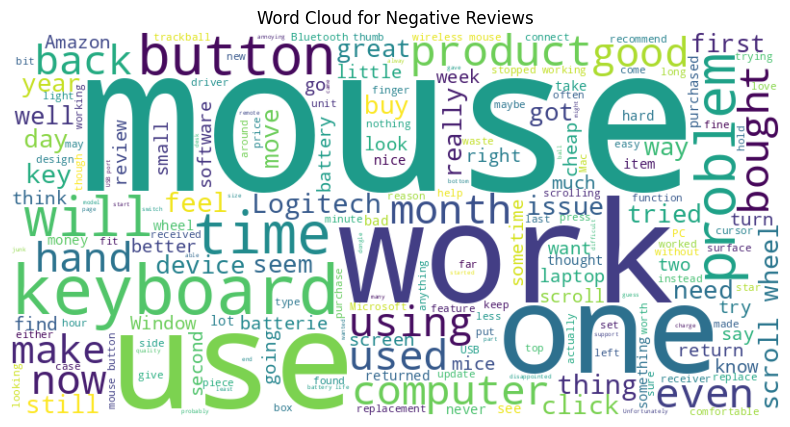

In [ ]:
positive_reviews = ' '.join(positive_df['reviewText'].astype(str))
negative_reviews = ' '.join(negative_df['reviewText'].astype(str))

# Generate word cloud for positive reviews
generate_wordcloud(positive_reviews, 'Word Cloud for Positive Reviews')

# Generate word cloud for negative reviews
generate_wordcloud(negative_reviews, 'Word Cloud for Negative Reviews')

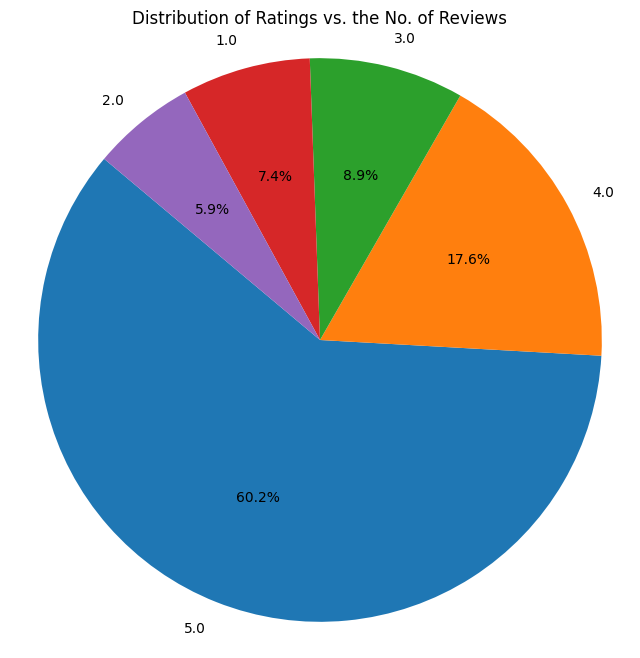

In [ ]:
import matplotlib.pyplot as plt

rating_distribution = review_df['overall'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings vs. the No. of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:

# Group by 'reviewYear' and count the number of reviews for each year
reviews_by_year = review_df.groupby('reviewYear').size()

# Find the year with the maximum number of reviews
year_with_max_reviews = reviews_by_year.idxmax()

print("Year with maximum reviews:", year_with_max_reviews)


Year with maximum reviews: 2016


In [ ]:
# Group by 'reviewYear' and count the number of unique customers (reviewers) for each year
customers_by_year = review_df.groupby('reviewYear')['reviewerID'].nunique()

# Find the year with the highest number of customers
year_with_max_customers = customers_by_year.idxmax()
max_customers_count = customers_by_year.max()

print("Year with the highest number of customers:", year_with_max_customers)
print("Number of customers in that year:", max_customers_count)


Year with the highest number of customers: 2016
Number of customers in that year: 27967


# Applying Machine Learning Models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Drop rows with missing values in 'reviewText' column
review_df.dropna(subset=['reviewText'], inplace=True)

# Use TF-IDF to encode review text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(review_df['reviewText'])


In [ ]:
def assign_rating_class(overall_rating):
    if overall_rating > 3:
        return 'Good'
    elif overall_rating == 3:
        return 'Average'
    else:
        return 'Bad'

def add_rating_class_column(df):
    df['Rating Class'] = df['overall'].apply(assign_rating_class)
    return df

In [ ]:
review_df = add_rating_class_column(review_df)

# Check the updated DataFrame
print(review_df.head(1))

   overall  verified reviewTime     reviewerID        asin     reviewerName  \
0      4.0      True 2016-12-07  AGO3EP72GI419  9803751263  Amazon Customer   

          reviewText            summary  unixReviewTime vote style image  \
0  Works as expected  Works as expected      1481068800  NaN   NaN   NaN   

   Processed_Review  reviewYear Rating Class  
0  Works a expected        2016         Good  


In [ ]:
y = review_df['Rating Class']  # Target variable: Rating Class

# Split the data into training and testing sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Train and evaluate Multinomial Naive Bayes
print("\nTraining Multinomial Naive Bayes...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Evaluating Multinomial Naive Bayes...")
print(classification_report(y_test, y_pred_nb))


Training Multinomial Naive Bayes...
Evaluating Multinomial Naive Bayes...
              precision    recall  f1-score   support

     Average       0.06      0.00      0.00      3269
         Bad       0.92      0.11      0.19      5007
        Good       0.79      1.00      0.88     29372

    accuracy                           0.79     37648
   macro avg       0.59      0.37      0.36     37648
weighted avg       0.75      0.79      0.72     37648



In [ ]:
# Train and evaluate Logistic Regression
print("\nTraining Logistic Regression...")
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Evaluating Logistic Regression...")
print(classification_report(y_test, y_pred_logistic))


Training Logistic Regression...
Evaluating Logistic Regression...
              precision    recall  f1-score   support

     Average       0.42      0.12      0.19      3269
         Bad       0.73      0.65      0.68      5007
        Good       0.88      0.97      0.93     29372

    accuracy                           0.85     37648
   macro avg       0.68      0.58      0.60     37648
weighted avg       0.82      0.85      0.83     37648



In [ ]:
# Train and evaluate K-Nearest Neighbors
print("\nTraining K-Nearest Neighbors...")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("Evaluating K-Nearest Neighbors...")
print(classification_report(y_test, y_pred_knn))


Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

     Average       0.31      0.02      0.04      3269
         Bad       0.71      0.10      0.17      5007
        Good       0.79      0.99      0.88     29372

    accuracy                           0.79     37648
   macro avg       0.61      0.37      0.37     37648
weighted avg       0.74      0.79      0.72     37648



In [ ]:
# Train and evaluate Support Vector Machine
print("\nTraining Support Vector Machine...")
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Evaluating Support Vector Machine...")
print(classification_report(y_test, y_pred_svm))


Training Support Vector Machine...
Evaluating Support Vector Machine...
              precision    recall  f1-score   support

     Average       0.59      0.11      0.18      3269
         Bad       0.76      0.65      0.70      5007
        Good       0.88      0.98      0.93     29372

    accuracy                           0.86     37648
   macro avg       0.74      0.58      0.60     37648
weighted avg       0.84      0.86      0.83     37648



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

print("\nTraining Gradient Boosting Machines (GBM)...")
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)
print("Evaluating Gradient Boosting Machines (GBM)...")
print(classification_report(y_test, y_pred_gbm))



Training Gradient Boosting Machines (GBM)...
Evaluating Gradient Boosting Machines (GBM)...
              precision    recall  f1-score   support

     Average       0.47      0.03      0.06      3269
         Bad       0.79      0.28      0.42      5007
        Good       0.82      0.99      0.90     29372

    accuracy                           0.81     37648
   macro avg       0.69      0.44      0.46     37648
weighted avg       0.78      0.81      0.76     37648



In [ ]:
import pickle
# /content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/
# Assuming model is your trained model
with open('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)


In [ ]:
# Assuming model is your trained model
with open('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/logistic_model.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)

In [ ]:
# Assuming model is your trained model
with open('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

In [ ]:
# Assuming model is your trained model
with open('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [ ]:
# Assuming model is your trained model
with open('/content/drive/MyDrive/Datasets/IR_Dataset_Assignment_3/gbm_model.pkl', 'wb') as f:
    pickle.dump(gbm_model, f)

# Collaborative Filtering :

In [ ]:
review_df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image', 'Processed_Review'],
      dtype='object')

In [ ]:
reviewer_counts = review_df['reviewerID'].value_counts()

# Filter out reviewers who have rated more than 5 times
reviewers_more_than_5 = reviewer_counts[reviewer_counts >= 5].index

# Create a new DataFrame containing only those reviewers
review_df2 = review_df[review_df['reviewerID'].isin(reviewers_more_than_5)]

In [ ]:
len(review_df2)

4524

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
import numpy as np


In [ ]:
user_item_matrix = review_df2.pivot_table(index='reviewerID', columns='asin', values='overall')

# Fill missing values with zeros (if a user hasn't rated a product, it will be marked as zero)
user_item_matrix = user_item_matrix.fillna(0)

In [ ]:
def min_max_scaling(row):
    # Min-max scaling formula: (x - min) / (max - min)
    min_rating = row.min()
    max_rating = row.max()
    scaled_row = (row - min_rating) / (max_rating - min_rating)
    return scaled_row

# Apply min-max scaling function to each row (user's reviews)
normalized_user_item_matrix = user_item_matrix.apply(min_max_scaling, axis=1)

In [ ]:
# Compute cosine similarity between all pairs of users
cosine_sim = cosine_similarity(normalized_user_item_matrix)

# Create a DataFrame to store the cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=normalized_user_item_matrix.index, columns=normalized_user_item_matrix.index)

# Get the top N similar users for each user
top_similar_users_10 = {}
N = 10
for user_id in cosine_sim_df.index:
    similar_users = cosine_sim_df.loc[user_id].sort_values(ascending=False)[1:N+1]  # Exclude the user itself
    top_similar_users_10[user_id] = similar_users

# Display the top N similar users for each user
for user_id, similar_users in top_similar_users_10.items():
    print(f"Top {N} similar users for User {user_id}:")
    print(similar_users)
    print()


In [ ]:
# Get the top N similar users for each user
top_similar_users_20 = {}
N = 20
for user_id in cosine_sim_df.index:
    similar_users = cosine_sim_df.loc[user_id].sort_values(ascending=False)[1:N+1]  # Exclude the user itself
    top_similar_users_20[user_id] = similar_users

# Display the top N similar users for each user
for user_id, similar_users in top_similar_users_20.items():
    print(f"Top {N} similar users for User {user_id}:")
    print(similar_users)
    print()


In [ ]:
# Get the top N similar users for each user
top_similar_users_30 = {}
N = 30
for user_id in cosine_sim_df.index:
    similar_users = cosine_sim_df.loc[user_id].sort_values(ascending=False)[1:N+1]  # Exclude the user itself
    top_similar_users_30[user_id] = similar_users

# Display the top N similar users for each user
for user_id, similar_users in top_similar_users_30.items():
    print(f"Top {N} similar users for User {user_id}:")
    print(similar_users)
    print()

In [ ]:
# Get the top N similar users for each user
top_similar_users_40 = {}
N = 40
for user_id in cosine_sim_df.index:
    similar_users = cosine_sim_df.loc[user_id].sort_values(ascending=False)[1:N+1]  # Exclude the user itself
    top_similar_users_40[user_id] = similar_users

# Display the top N similar users for each user
for user_id, similar_users in top_similar_users_40.items():
    print(f"Top {N} similar users for User {user_id}:")
    print(similar_users)
    print()

In [ ]:
# Get the top N similar users for each user
top_similar_users_50 = {}
N = 50
for user_id in cosine_sim_df.index:
    similar_users = cosine_sim_df.loc[user_id].sort_values(ascending=False)[1:N+1]  # Exclude the user itself
    top_similar_users_50[user_id] = similar_users

# Display the top N similar users for each user
for user_id, similar_users in top_similar_users_50.items():
    print(f"Top {N} similar users for User {user_id}:")
    print(similar_users)
    print()

In [ ]:
# Method to find top N neighbors
def find_n_neighbors(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(axis=1, func=lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index,
                                                   index=['top{}'.format(i) for i in range(1, n+1)]))
    return df


In [ ]:
# Create a new DataFrame containing the required columns
review_df2 = review_df2[['reviewerID', 'asin', 'overall']].copy()

# Rename columns to match the desired names
review_df2.rename(columns={'reviewerID': 'userId', 'asin': 'productId', 'overall': 'rating'}, inplace=True)


In [ ]:
user_item = review_df2.pivot_table(index='userId', columns='productId', values='rating', aggfunc='mean').fillna(0)
print('Shape of User-Item sparse matrix:', user_item.shape)
user_item.head()


In [ ]:
# Create the Item-User sparse matrix using pivot_table and aggregation
item_user = review_df2.pivot_table(index='productId', columns='userId', values='rating', aggfunc='mean').fillna(0)
print('Shape of Item-User sparse matrix:', item_user.shape)
item_user.head()


In [ ]:
# Calculate the user-user similarity
user_similarity = cosine_similarity(user_item)
np.fill_diagonal(user_similarity, 0)
user_similarity_df = pd.DataFrame(user_similarity,index=user_item.index, columns=user_item.index)
user_similarity_df.head()

In [ ]:
# Calculate the item-item similarity
item_similarity = cosine_similarity(item_user)
np.fill_diagonal(item_similarity, 0)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user.index, columns=item_user.index)
item_similarity_df.head()

In [ ]:
# Find 10 neighbors of each user
user_10_neighbors = find_n_neighbors(user_similarity_df, 10)
user_10_neighbors.head(10)

In [ ]:
# Find 10 neighbors of each item
item_10_neighbors = find_n_neighbors(item_similarity_df, 10)
item_10_neighbors.head(10)

In [ ]:
def get_users_similar_products(user1, user2):
    common_products = review_df2[review_df2.userId == user1].merge(
    review_df2[review_df2.userId == user2],
    on = "productId",
    how = "inner" )
    return common_products[['rating_x', 'rating_y', 'productId']].head()

In [ ]:
review_df2.head(5)

,userId,productId,rating
0,AGO3EP72GI419,9803751263,4.0
35,A2TKWMX4563NR6,B00000J1V7,5.0
49,A1LSNQQ37FA5J9,B00000K4LF,2.0
100,A1TT4MFV1HKWD5,B0000511L1,3.0
107,A2BMZRO0H7TFCS,B000052WM4,3.0


In [ ]:
get_users_similar_products('A1TT4MFV1HKWD5', 'A2BMZRO0H7TFCS')

,rating_x,rating_y,productId


In [ ]:
# Method to predict the rating
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
from time import time

# Define the predict function and similarity matrices
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings.values - mean_user_rating.values[:, np.newaxis])
        pred = mean_user_rating.values[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

# Predict ratings using User-based Collaborative Filtering (UBCF)
start_time = time()
user_prediction = predict(user_item, user_similarity, type='user')
user_prediction = pd.DataFrame(user_prediction, index=user_item.index, columns=user_item.columns)
print('Time taken %.2fs to predict ratings using UBCF' % (time() - start_time))
user_prediction.head()

# Predict ratings using Item-based Collaborative Filtering (IBCF)
start_time = time()
item_prediction = predict(user_item, item_similarity, type='item')
print('Time taken %.2fs to predict ratings using IBCF' % (time() - start_time))

<ipython-input-68-288451ddc5a3>:8: RuntimeWarning: invalid value encountered in divide
  pred = mean_user_rating.values[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T


Time taken 0.20s to predict ratings using UBCF
Time taken 0.24s to predict ratings using IBCF


In [ ]:
# Method to Recommend the items with the highest predicted ratings
def recommend_items(userId, orig_df, preds_df, top_n):
    # Get and sort the user's ratings
    sorted_user_ratings = orig_df.loc[userId].sort_values(ascending=False) #sorted_user_ratings
    sorted_user_predictions = preds_df.loc[userId].sort_values(ascending=False) #sorted_user_predictions

    # Prepare recommendations
    recommedations = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    recommedations.index.name = 'Recommended Items'
    recommedations.columns = ['user_ratings', 'user_predictions']

    # Take the products which user has NOT rated
    recommedations = recommedations.loc[recommedations.user_ratings == 0]
    recommedations = recommedations.sort_values('user_predictions', ascending=False)
    return recommedations.head(top_n)

In [ ]:
# Find recommendation for couple of users using UBCF
find_recom = {'A10LWFKVC21F82': 5,
              'AZD6H3IUO2BJJ':4}   # This list is user, top_n recommendation dict.
for user in find_recom:
    print("Top %d recommendations for the userId: %s" %(find_recom[user],user))
    ans = recommend_items(user, user_item, user_prediction, find_recom[user])
    print(ans)
    print("\n")

Top 5 recommendations for the userId: A10LWFKVC21F82
                   user_ratings  user_predictions
Recommended Items                                
B002HWRJBM                  0.0          0.786509
B011WBI4S0                  0.0          0.556996
B010MS67ZG                  0.0          0.556996
B005DSPLDA                  0.0          0.530740
B002B3YCQM                  0.0          0.409003


Top 4 recommendations for the userId: AZD6H3IUO2BJJ
                   user_ratings  user_predictions
Recommended Items                                
B01GI93F76                  0.0          0.673100
B01FM3G9TU                  0.0          0.673100
B005HQ514C                  0.0          0.602968
B00ADBY98A                  0.0          0.204812




In [ ]:
# Method to calculate MAE for different models
def calculate_mae(orig_df, preds_df):
    mae_df = pd.concat([orig_df.mean(), preds_df.mean()], axis=1)
    mae_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
    MAE = round((mae_df.Avg_actual_ratings - mae_df.Avg_predicted_ratings).abs().mean(), 5)
    print('\nMAE for this recommender model = {}\n'.format(MAE))
    return mae_df.head()


In [ ]:
# Method to calculate RMSE for different model
def calculate_rmse(orig_df, preds_df):
    rmse_df = pd.concat([orig_df.mean(), preds_df.mean()], axis=1)
    rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
    RMSE = round(np.sqrt(((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean()), 5)
    print('\nRMSE for this recommender model = {}\n'.format(RMSE))
    return rmse_df.head()

In [ ]:
calculate_rmse(user_item, user_prediction)


RMSE for this recommender model = 0.02732



,Avg_actual_ratings,Avg_predicted_ratings
productId,,
9803751263,0.005398,0.004782
B00000J1V7,0.006748,0.001551
B00000K4LF,0.002699,0.000574
B0000511E5,0.006748,-0.000475
B0000511L1,0.004049,0.002981


In [ ]:
calculate_rmse(user_item, item_prediction)


RMSE for this recommender model = nan



,Avg_actual_ratings,Avg_predicted_ratings
9803751263,0.005398,NaN
B00000J1V7,0.006748,NaN
B00000K4LF,0.002699,NaN
B0000511E5,0.006748,NaN
B0000511L1,0.004049,NaN


In [ ]:
# Create a list of users
users = ['A10LWFKVC21F82','AZD6H3IUO2BJJ']
top_k = 5

# UBCF Recommendation
print('User Based Collaborative Filtering (UBCF)')
for user in users:
    print("Top %d recommendations for the userId: %s" %(top_k,user))
    ans = recommend_items(user, user_item, user_prediction, top_k)
    print(ans)
    print("\n")

User Based Collaborative Filtering (UBCF)
Top 5 recommendations for the userId: A10LWFKVC21F82
                   user_ratings  user_predictions
Recommended Items                                
B002HWRJBM                  0.0          0.786509
B011WBI4S0                  0.0          0.556996
B010MS67ZG                  0.0          0.556996
B005DSPLDA                  0.0          0.530740
B002B3YCQM                  0.0          0.409003


Top 5 recommendations for the userId: AZD6H3IUO2BJJ
                   user_ratings  user_predictions
Recommended Items                                
B01GI93F76                  0.0          0.673100
B01FM3G9TU                  0.0          0.673100
B005HQ514C                  0.0          0.602968
B00ADBY98A                  0.0          0.204812
B004XIOJ7A                  0.0          0.193922




In [ ]:
# IBCF Recommendation
print('Item Based Collaborative Filtering (IBCF)')
for user in users:
    print("Top %d recommendations for the userId: %s" %(top_k,user))
    recommend_items(user, user_item, item_prediction, top_k)
    print("\n")

Item Based Collaborative Filtering (IBCF)
Top 5 recommendations for the userId: A10LWFKVC21F82


Top 5 recommendations for the userId: AZD6H3IUO2BJJ




In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the user-user similarity matrix
user_similarity_matrix = cosine_similarity(user_item)

# Method to find top N similar users
def top_n_similar_users(similarity_matrix, n):
    similar_users = np.argsort(-similarity_matrix, axis=1)[:, 1:n+1]
    return similar_users

# Specify N values
N_values = [10, 20, 30, 40, 50]

# Dictionary to store top N similar users for each N
top_similar_users_dict = {}
for N in N_values:
    top_similar_users_dict[N] = top_n_similar_users(user_similarity_matrix,N)

In [ ]:
from sklearn.model_selection import KFold

# Specify number of folds
K = 5

# Initialize KFold
kf = KFold(n_splits=K)

# Convert user_item DataFrame to NumPy array
user_item_array = user_item.values

# Split the data into K folds
for train_index, test_index in kf.split(user_item_array):
    train_set, test_set = user_item_array[train_index], user_item_array[test_index]

In [ ]:
from sklearn.metrics import mean_absolute_error

def predict_ratings(train_matrix, test_matrix, similarity_matrix, similar_users):
    predicted_matrix = np.zeros_like(test_matrix)
    for i in range(len(test_matrix)):
        for j in range(len(test_matrix[i])):
            if test_matrix[i][j] == 0:  # Only predict for missing values
                if i < len(similar_users) and similar_users[i].any():  # Ensure similar_users is not empty
                    user_index = similar_users[i][0] if similar_users[i][0] < len(train_matrix) else 0  # Adjust user index
                    numerator = np.sum(train_matrix[user_index, j] * similarity_matrix[i][user_index])
                    denominator = np.sum(np.abs(similarity_matrix[i][user_index]))
                    if denominator != 0:
                        predicted_matrix[i][j] = numerator / denominator
    return predicted_matrix

# Calculate predicted ratings for each fold
predicted_ratings = []
user_item_array = user_item.values

# Split the data into K folds
for train_index, test_index in kf.split(user_item_array):
    train_set, test_set = user_item_array[train_index], user_item_array[test_index]
    similarity_matrix = cosine_similarity(train_set)
    similar_users = top_similar_users_dict[10]  # Choose N as per requirement
    predicted_matrix = predict_ratings(train_set, test_set, similarity_matrix, similar_users)

    # Pad the predicted ratings matrix to ensure uniform shape
    max_shape = max(predicted_matrix.shape)
    padded_matrix = np.pad(predicted_matrix, ((0, max_shape - predicted_matrix.shape[0]), (0, max_shape - predicted_matrix.shape[1])), mode='constant')

    predicted_ratings.append(padded_matrix)

# Convert list of predicted ratings arrays to numpy array
predicted_ratings = np.array(predicted_ratings)

# Calculate error for each fold
errors = []
for i in range(len(predicted_ratings)):
    test_fold_shape = test_set.shape  # Fix here
    predicted_fold_shape = predicted_ratings[i].shape
    # Slice the predicted ratings array to match the shape of the test set
    predicted_fold = predicted_ratings[i][:test_fold_shape[0], :test_fold_shape[1]]  # Fix here
    error = np.abs(test_set - predicted_fold)  # Fix here
    errors.append(error)

# Convert list of errors arrays to numpy array
errors = np.array(errors)

# Calculate Mean Absolute Error (MAE) for each fold
mae_values = np.mean(errors, axis=(1,2))

In [ ]:
# Print Mean Absolute Error (MAE) for each fold
for fold, mae in enumerate(mae_values):
    print(f"Fold {fold + 1} MAE: {mae}")

# Calculate the average MAE across all folds
average_mae = np.mean(mae_values)
print(f"\nAverage MAE across all folds: {average_mae}")

Fold 1 MAE: 0.027218255991840898
Fold 2 MAE: 0.03024604793472718
Fold 3 MAE: 0.03310031729843051
Fold 4 MAE: 0.03469389200521276
Fold 5 MAE: 0.04077072355374242

Average MAE across all folds: 0.03320584735679075


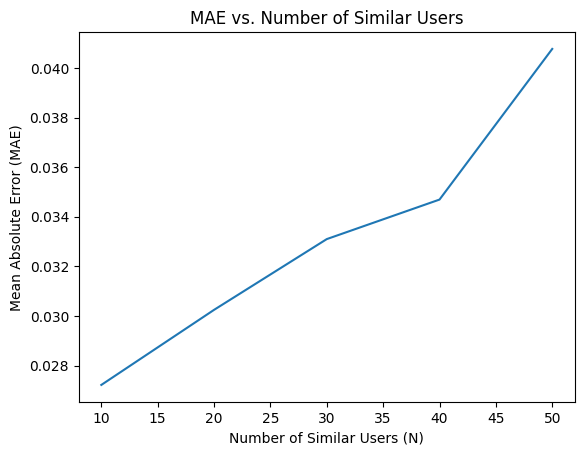

In [ ]:
import matplotlib.pyplot as plt

# Visualize the MAE values
plt.plot([10, 20, 30, 40, 50], mae_values)
plt.xlabel('Number of Similar Users (N)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Similar Users')
plt.show()

In [ ]:
# Sum the ratings for each product across all users
product_sum_ratings = user_item.sum(axis=0)

# Sort the products based on their sum ratings in descending order
top_products = product_sum_ratings.sort_values(ascending=False)

# Get the top 10 products
top_10_products = top_products.head(10)

# Print the top 10 products by user sum ratings
print("Top 10 Products by User Sum Ratings:")
for rank, (product_id, sum_rating) in enumerate(top_10_products.items(), 1):
    print(f"{rank}. Product ID: {product_id}, Sum Rating: {sum_rating}")

Top 10 Products by User Sum Ratings:
1. Product ID: B010MS67ZG, Sum Rating: 1199.0
2. Product ID: B011WBI4S0, Sum Rating: 1199.0
3. Product ID: B005DSPLDA, Sum Rating: 983.0
4. Product ID: B01GI93F76, Sum Rating: 488.5
5. Product ID: B01FM3G9TU, Sum Rating: 484.5
6. Product ID: B005HQ514C, Sum Rating: 458.0
7. Product ID: B0043T7FXE, Sum Rating: 227.0
8. Product ID: B00BP5KOPA, Sum Rating: 218.0
9. Product ID: B002HWRJBM, Sum Rating: 199.0
10. Product ID: B004XIOJ7A, Sum Rating: 175.0
